# Lead question: Are visa applications to Germany from African countries less successful than visa applications from elsewhere?

**Idea:** by Daniel Pelz

**Data Source:** German Foreign Office. Provided to German party "Die Linke" via several "Kleine Anfragen" and upon own request

**Provided Data Format:** PDF files

# Data cleaning

In [3]:
#loading all charting libraries and tools needed
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import dateutil.parser
import numpy as np
import seaborn as sns
import squarify
from statsmodels.graphics.mosaicplot import mosaic
import pylab
from itertools import product

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 30)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

First steps before reading in the data:
    - converted pdf files for each year into a csv file using Abbyy Fine Reader
    - cleaned csv files with Regular Expressions to make sure they are all formatted the same way

In [4]:
# Read in the csv file on visa applications from each year
# Add a column on what year they refer to
# Create one large table out of all of them

visa_applications = pd.DataFrame()

years_list = ['2014','2015', '2016', '2017']

for year in years_list:
    df = pd.read_csv("data/output/Visa-Antraege-"+year+".csv")
    df['year'] = year
    visa_applications = visa_applications.append(df)
    
visa_applications = visa_applications.reset_index()

In [5]:
visa_applications.head()

,index,Land,AV-Ort,Schengen gesamt erteilt,Schengen gesamt abgelehnt,Schengen gesamt zurückgezogen,Schengen gesamt bearbeitet,Schengen Ablehnungsquote,D gesamt erteilt,D gesamt abgelehnt,D gesamt zurückgezogen,D gesamt bearbeitet,D Ablehnungsquote,year
0,0,Afghanistan,Kabul,1367,1056,24,2447,43.15%,2245,155,19,2419,6.41%,2014
1,1,Ägypten,Kairo,25415,1811,98,27324,6.63%,3688,231,110,4029,5.73%,2014
2,2,Albanien,Tirana,43,1,1,45,2.22%,850,166,21,1037,16.01%,2014
3,3,Algerien,Algier,4489,1442,36,5967,24.17%,657,111,9,777,14.29%,2014
4,4,Angola,Luanda,1916,767,23,2706,28.34%,44,1,2,47,2.13%,2014


In [6]:
# checking what datatype Pandas thinks each column has
visa_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 14 columns):
index                            773 non-null int64
Land                             773 non-null object
AV-Ort                           701 non-null object
Schengen gesamt erteilt          773 non-null int64
Schengen gesamt abgelehnt        773 non-null int64
Schengen gesamt zurückgezogen    773 non-null int64
Schengen gesamt bearbeitet       773 non-null int64
Schengen Ablehnungsquote         773 non-null object
D gesamt erteilt                 773 non-null int64
D gesamt abgelehnt               773 non-null int64
D gesamt zurückgezogen           773 non-null int64
D gesamt bearbeitet              773 non-null int64
D Ablehnungsquote                773 non-null object
year                             773 non-null object
dtypes: int64(9), object(5)
memory usage: 84.6+ KB


In [7]:
# convert percentage strings to numbers

def delete_percentage_sign(string):
    try:
        number = string.strip("%")
        return float(number)
    except:
        pass

list_quota_columns = ['Schengen Ablehnungsquote','D Ablehnungsquote']

for column in list_quota_columns:
    column_name = column.replace(" ", "_") + "_percent"
    visa_applications[column_name] = visa_applications[column].apply(delete_percentage_sign)

In [8]:
#checking whether conversion worked correctly
visa_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 16 columns):
index                               773 non-null int64
Land                                773 non-null object
AV-Ort                              701 non-null object
Schengen gesamt erteilt             773 non-null int64
Schengen gesamt abgelehnt           773 non-null int64
Schengen gesamt zurückgezogen       773 non-null int64
Schengen gesamt bearbeitet          773 non-null int64
Schengen Ablehnungsquote            773 non-null object
D gesamt erteilt                    773 non-null int64
D gesamt abgelehnt                  773 non-null int64
D gesamt zurückgezogen              773 non-null int64
D gesamt bearbeitet                 773 non-null int64
D Ablehnungsquote                   773 non-null object
year                                773 non-null object
Schengen_Ablehnungsquote_percent    743 non-null float64
D_Ablehnungsquote_percent           771 non-null float64
dtypes

In [9]:
visa_applications.head()

,index,Land,AV-Ort,Schengen gesamt erteilt,Schengen gesamt abgelehnt,Schengen gesamt zurückgezogen,Schengen gesamt bearbeitet,Schengen Ablehnungsquote,D gesamt erteilt,D gesamt abgelehnt,D gesamt zurückgezogen,D gesamt bearbeitet,D Ablehnungsquote,year,Schengen_Ablehnungsquote_percent,D_Ablehnungsquote_percent
0,0,Afghanistan,Kabul,1367,1056,24,2447,43.15%,2245,155,19,2419,6.41%,2014,43.15,6.41
1,1,Ägypten,Kairo,25415,1811,98,27324,6.63%,3688,231,110,4029,5.73%,2014,6.63,5.73
2,2,Albanien,Tirana,43,1,1,45,2.22%,850,166,21,1037,16.01%,2014,2.22,16.01
3,3,Algerien,Algier,4489,1442,36,5967,24.17%,657,111,9,777,14.29%,2014,24.17,14.29
4,4,Angola,Luanda,1916,767,23,2706,28.34%,44,1,2,47,2.13%,2014,28.34,2.13


In [10]:
visa_applications.columns

Index(['index', 'Land', 'AV-Ort', 'Schengen gesamt erteilt',
       'Schengen gesamt abgelehnt', 'Schengen gesamt zurückgezogen',
       'Schengen gesamt bearbeitet', 'Schengen Ablehnungsquote',
       'D gesamt erteilt', 'D gesamt abgelehnt', 'D gesamt zurückgezogen',
       'D gesamt bearbeitet', 'D Ablehnungsquote', 'year',
       'Schengen_Ablehnungsquote_percent', 'D_Ablehnungsquote_percent'],
      dtype='object')

In [11]:
# # only keeping the cleaned-up columns
visa_applications = visa_applications[['index', 'year' ,'Land', 'AV-Ort','Schengen gesamt bearbeitet','Schengen gesamt zurückgezogen','Schengen gesamt erteilt', 'Schengen gesamt abgelehnt','Schengen_Ablehnungsquote_percent','D gesamt bearbeitet','D gesamt zurückgezogen','D gesamt erteilt','D gesamt abgelehnt','D_Ablehnungsquote_percent']]

# giving the columns English titles
visa_applications.columns = (['entry_index', 'year', 'country', 'local_branch', 'Schengen_processed_applications', 'Schengen_withdrawn_applications', 'Schengen_granted_applications', 'Schengen_rejected_applications', 'Schengen_share_rejected', 'GER_processed_applications', 'GER_withdrawn_applications', 'GER_granted_applications', 'GER_rejected_applications','GER_share_rejected'])

In [12]:
visa_applications.head(20)

,entry_index,year,country,local_branch,Schengen_processed_applications,Schengen_withdrawn_applications,Schengen_granted_applications,Schengen_rejected_applications,Schengen_share_rejected,GER_processed_applications,GER_withdrawn_applications,GER_granted_applications,GER_rejected_applications,GER_share_rejected
0,0,2014,Afghanistan,Kabul,2447,24,1367,1056,43.15,2419,19,2245,155,6.41
1,1,2014,Ägypten,Kairo,27324,98,25415,1811,6.63,4029,110,3688,231,5.73
2,2,2014,Albanien,Tirana,45,1,43,1,2.22,1037,21,850,166,16.01
3,3,2014,Algerien,Algier,5967,36,4489,1442,24.17,777,9,657,111,14.29
4,4,2014,Angola,Luanda,2706,23,1916,767,28.34,47,2,44,1,2.13
5,5,2014,Argentinien,Buenos Aires,174,6,166,2,1.15,830,20,781,29,3.49
6,6,2014,Armenien,Eriwan,13975,321,12374,1280,9.16,758,47,626,85,11.21
7,7,2014,Aserbaidschan,Baku,16331,30,15604,697,4.27,765,22,672,71,9.28
8,8,2014,Äthiopien,Addis Abeba,3731,53,2728,950,25.46,469,13,393,63,13.43
9,9,2014,Australien,Canberra,29,3,26,0,0.00,64,4,60,0,0.00


In [13]:
visa_applications.to_csv('data/output/visa_applications_2014to2017.csv')

Next steps: 
- Open exported file in OpenRefine and unify country and branch names
- Reload refined datasets

# Reading in cleaned data

In [14]:
visa_applications = pd.read_csv('data/output/visa_applications_2014to2017-refined.csv')

In [15]:
visa_applications.columns

Index(['Column', 'entry_index', 'year', 'country', 'local_branch',
       'Schengen_processed_applications', 'Schengen_withdrawn_applications',
       'Schengen_granted_applications', 'Schengen_rejected_applications',
       'Schengen_share_rejected', 'GER_processed_applications',
       'GER_withdrawn_applications', 'GER_granted_applications',
       'GER_rejected_applications', 'GER_share_rejected'],
      dtype='object')

In [16]:
visa_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 15 columns):
Column                             773 non-null int64
entry_index                        773 non-null int64
year                               773 non-null int64
country                            773 non-null object
local_branch                       701 non-null object
Schengen_processed_applications    773 non-null int64
Schengen_withdrawn_applications    773 non-null int64
Schengen_granted_applications      773 non-null int64
Schengen_rejected_applications     773 non-null int64
Schengen_share_rejected            754 non-null float64
GER_processed_applications         773 non-null int64
GER_withdrawn_applications         773 non-null int64
GER_granted_applications           773 non-null int64
GER_rejected_applications          773 non-null int64
GER_share_rejected                 773 non-null float64
dtypes: float64(2), int64(11), object(2)
memory usage: 90.7+ KB


In [17]:
visa_applications['year'] = [dateutil.parser.parse(str(value)).strftime('%Y') for value in visa_applications['year']]

In [18]:
visa_applications.head()

,Column,entry_index,year,country,local_branch,Schengen_processed_applications,Schengen_withdrawn_applications,Schengen_granted_applications,Schengen_rejected_applications,Schengen_share_rejected,GER_processed_applications,GER_withdrawn_applications,GER_granted_applications,GER_rejected_applications,GER_share_rejected
0,0,0,2014,Afghanistan,Kabul,2447,24,1367,1056,43.15,2419,19,2245,155,6.41
1,1,1,2014,Ägypten,Kairo,27324,98,25415,1811,6.63,4029,110,3688,231,5.73
2,2,2,2014,Albanien,Tirana,45,1,43,1,2.22,1037,21,850,166,16.01
3,3,3,2014,Algerien,Algier,5967,36,4489,1442,24.17,777,9,657,111,14.29
4,4,4,2014,Angola,Luanda,2706,23,1916,767,28.34,47,2,44,1,2.13


# Data inspection and preparation

## Data remodeling

In [19]:
visa_applications_schengen = visa_applications[['entry_index', 'year', 'country', 'local_branch',
       'Schengen_processed_applications', 'Schengen_withdrawn_applications','Schengen_granted_applications', 
       'Schengen_rejected_applications','Schengen_share_rejected']]

visa_applications_germany = visa_applications[['entry_index', 'year', 'country', 'local_branch',
       'GER_processed_applications','GER_withdrawn_applications', 'GER_granted_applications',
       'GER_rejected_applications', 'GER_share_rejected']]

In [20]:
visa_applications_schengen['applied_to'] = 'Schengen'
visa_applications_germany['applied_to'] = 'Germany'

visa_applications_schengen.columns = (['entry_index', 'year', 'country', 'local_branch','processed_applications','withdrawn_applications', 'granted_applications','rejected_applications', 'share_rejected', 'applied_to'])
visa_applications_germany.columns = (['entry_index', 'year', 'country', 'local_branch','processed_applications','withdrawn_applications', 'granted_applications','rejected_applications', 'share_rejected', 'applied_to'])

In [21]:
visa_applications_remodeled = visa_applications_schengen.append(visa_applications_germany)
visa_applications_remodeled = visa_applications_remodeled[['entry_index', 'year', 'country', 'local_branch','applied_to',
       'processed_applications', 'withdrawn_applications','granted_applications', 'rejected_applications', 'share_rejected']]

In [22]:
visa_applications_remodeled.head()

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected
0,0,2014,Afghanistan,Kabul,Schengen,2447,24,1367,1056,43.15
1,1,2014,Ägypten,Kairo,Schengen,27324,98,25415,1811,6.63
2,2,2014,Albanien,Tirana,Schengen,45,1,43,1,2.22
3,3,2014,Algerien,Algier,Schengen,5967,36,4489,1442,24.17
4,4,2014,Angola,Luanda,Schengen,2706,23,1916,767,28.34


## Getting rid of 'total' ('gesamt') duplicates

For countries with several branches, each office is listed separately. In addition the respective country has a total ('Gesamt') entry.
In order to not falsify results, these total figures are filtered out.

Additionally, country and local branch are fused into one name.

In [23]:
visa_applications_remodeled[visa_applications_remodeled['country'].str.contains('Gesamt')]

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected
11,11,2014,Gesamt Australien,NaN,Schengen,31,3,27,1,3.23
23,23,2014,Gesamt Brasilien,NaN,Schengen,371,29,318,24,6.47
32,32,2014,Gesamt China,NaN,Schengen,318394,515,304820,13059,4.10
47,47,2014,Gesamt Großbritannien,NaN,Schengen,28450,154,27627,669,2.35
56,56,2014,Gesamt Indien,NaN,Schengen,110176,184,101267,8725,7.92
60,60,2014,Gesamt Irak,NaN,Schengen,10710,118,10198,394,3.68
69,69,2014,Gesamt Japan,NaN,Schengen,1871,20,1842,9,0.48
76,76,2014,Gesamt Kanada,NaN,Schengen,2452,47,2384,21,0.86
79,79,2014,Gesamt Kasachstan,NaN,Schengen,42788,214,41838,736,1.72
116,116,2014,Gesamt Nigeria,NaN,Schengen,15470,150,11049,4271,27.61


In [24]:
va_singles = visa_applications_remodeled[~visa_applications_remodeled['country'].str.contains('Gesamt')] 
va_singles.head()

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected
0,0,2014,Afghanistan,Kabul,Schengen,2447,24,1367,1056,43.15
1,1,2014,Ägypten,Kairo,Schengen,27324,98,25415,1811,6.63
2,2,2014,Albanien,Tirana,Schengen,45,1,43,1,2.22
3,3,2014,Algerien,Algier,Schengen,5967,36,4489,1442,24.17
4,4,2014,Angola,Luanda,Schengen,2706,23,1916,767,28.34


In [25]:
va_singles['application_origin']  = va_singles['country'] + ' – ' + va_singles['local_branch']

In [26]:
len(visa_applications_remodeled)

1546

In [27]:
len(va_singles)

1394

## Getting rid of applications filed in an EU country

The dataset also contains applications filed in a country that is part of the EU/Schengen zone. Since EU citizens would not need to apply for a visum, it must be citizens of other nations.
For further analysis, EU countries are excluded.

In [28]:
world_countries = pd.read_csv('data/input/Welt_Laender.csv')
world_countries

,name,region
0,Belgien,EU
1,Bulgarien,EU
2,Tschechische Republik,EU
3,Dänemark,EU
4,Deutschland,EU
5,Estland,EU
6,Irland,EU
7,Griechenland,EU
8,Spanien,EU
9,Frankreich,EU


In [29]:
va_singles = va_singles.merge(world_countries, left_on='country', right_on = 'name')
va_singles.head()

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected,application_origin,name,region
0,0,2014,Afghanistan,Kabul,Schengen,2447,24,1367,1056,43.15,Afghanistan – Kabul,Afghanistan,Asien
1,0,2015,Afghanistan,Kabul,Schengen,2251,28,1145,1078,47.89,Afghanistan – Kabul,Afghanistan,Asien
2,0,2016,Afghanistan,Kabul,Schengen,2730,41,1526,1163,42.60,Afghanistan – Kabul,Afghanistan,Asien
3,0,2017,Afghanistan,Kabul,Schengen,1079,20,586,473,43.84,Afghanistan – Kabul,Afghanistan,Asien
4,0,2014,Afghanistan,Kabul,Germany,2419,19,2245,155,6.41,Afghanistan – Kabul,Afghanistan,Asien


In [30]:
va_singles = va_singles[va_singles['region']!='EU']

In [31]:
len(va_singles)

1178

## Check on the way the Foreign Office calculates the 'share rejected'

It's interesting that the number of processed applications includes also withdrawn applications.

The AA computes the 'share rejected' by rejected/processed, so:

    rejected / (granted + rejected + withdrawn)
    
However, a withdrawn application cannot be rejected by the authorities, so it does not make sense to include these in  the calculation. A more intuitive way to compute the share of negative decitions would be:

    rejected / (granted + rejected)

Due to the computation performed by AA the rejection share is smaller as than it would be if you'd calculate it the more intuitive way.

Hence, we introduce a new variable 'decisions' that is calculated

    decisions = granted + rejected
   
and we calculate and further on use the rejected share calculated as

    share_negative = rejected / decisions

In [32]:
va_singles.head()

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected,application_origin,name,region
0,0,2014,Afghanistan,Kabul,Schengen,2447,24,1367,1056,43.15,Afghanistan – Kabul,Afghanistan,Asien
1,0,2015,Afghanistan,Kabul,Schengen,2251,28,1145,1078,47.89,Afghanistan – Kabul,Afghanistan,Asien
2,0,2016,Afghanistan,Kabul,Schengen,2730,41,1526,1163,42.60,Afghanistan – Kabul,Afghanistan,Asien
3,0,2017,Afghanistan,Kabul,Schengen,1079,20,586,473,43.84,Afghanistan – Kabul,Afghanistan,Asien
4,0,2014,Afghanistan,Kabul,Germany,2419,19,2245,155,6.41,Afghanistan – Kabul,Afghanistan,Asien


In [33]:
va_singles['decisions'] = va_singles['granted_applications'] + va_singles['rejected_applications']
va_singles['share_negative'] = round(va_singles['rejected_applications']/va_singles['decisions']*100)

## How big is the difference between the two ways to calculate the share of rejected applications?

In [34]:
va_singles['pp_difference'] = va_singles['share_negative'] - va_singles['share_rejected']

**Read:** If pp_difference is a positive number, it means the Foreign office rejection rate is smaller than the intuitive one.
Whereas if it is a negative number, it means the Foreign office rejection rate is larger than the intuitive one.

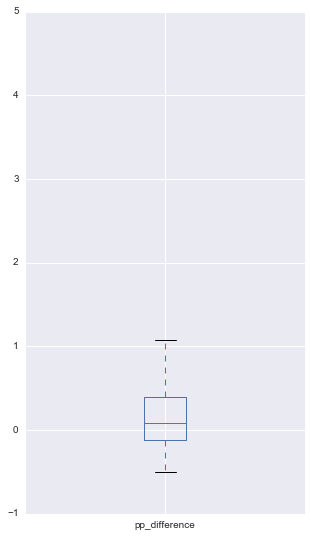

In [35]:
va_singles['pp_difference'].plot(kind = 'box', figsize = (5,9))

In [36]:
min_diff_schengen = va_singles[va_singles['applied_to']=='Schengen']['pp_difference'].min()
min_diff_schengen

-0.5

In [37]:
va_singles[(va_singles['applied_to']=='Schengen')&(va_singles['pp_difference']==min_diff_schengen)]

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected,application_origin,name,region,decisions,share_negative,pp_difference
649,90,2015,Kuwait,Kuwait,Schengen,60272,60,58707,1505,2.5,Kuwait – Kuwait,Kuwait,Asien,60212,2.0,-0.5


In [38]:
max_diff_schengen = va_singles[va_singles['applied_to']=='Schengen']['pp_difference'].max()
max_diff_schengen

3.1799999999999997

In [39]:
va_singles[(va_singles['applied_to']=='Schengen')&(va_singles['pp_difference']==max_diff_schengen)]

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected,application_origin,name,region,decisions,share_negative,pp_difference
619,86,2017,"Korea, DVR",Pjöngjang,Schengen,154,12,93,49,31.82,"Korea, DVR – Pjöngjang","Korea, DVR",Asien,142,35.0,3.18


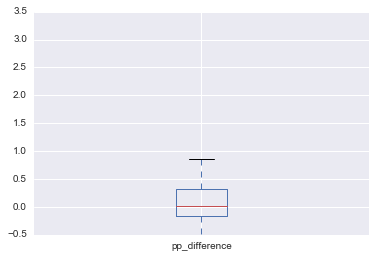

In [40]:
va_singles[va_singles['applied_to']=='Schengen']['pp_difference'].plot(kind='box')

In [41]:
min_diff_germany = va_singles[va_singles['applied_to']=='Germany']['pp_difference'].min()
min_diff_germany

-0.5

In [42]:
va_singles[va_singles['applied_to']=='Germany']['pp_difference'].mean()

0.23678023850085175

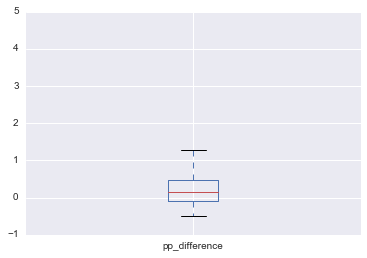

In [43]:
va_singles[va_singles['applied_to']=='Germany']['pp_difference'].plot(kind='box')

In [44]:
max_diff_germany = va_singles[va_singles['applied_to']=='Germany']['pp_difference'].max()
max_diff_germany

4.1099999999999994

In [45]:
va_singles[(va_singles['applied_to']=='Germany')&(va_singles['pp_difference']==max_diff_germany)]

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected,application_origin,name,region,decisions,share_negative,pp_difference
1399,191,2016,Zypern,Nikosia,Germany,45,6,26,13,28.89,Zypern – Nikosia,Zypern,Asien,39,33.0,4.11


**Read:** In the cases with the highest difference for both Schengen and Germany, it's related to countries with just very small numbers of applications. For the majority of countries it does not make a big difference at all

# Data analysis

## How has the absolute number of visa applications changed over time in Germany/Schengen?

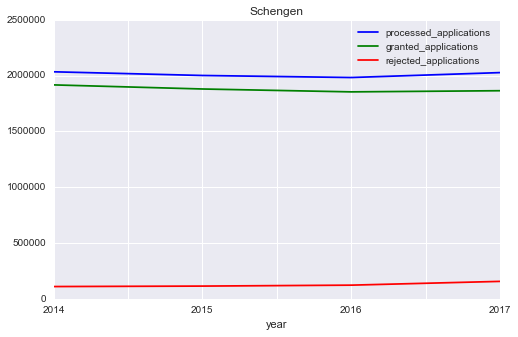

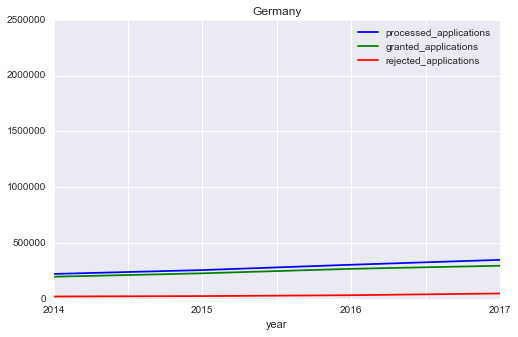

In [46]:
country_list = ['Schengen', 'Germany']

for country in country_list:
    fig, ax = plt.subplots(figsize=(8,5))
    ax.set_title(country)
    va_singles[va_singles['applied_to']==country].groupby(by='year')['processed_applications'].sum().plot(ax = ax, ylim = (0,2500000), c='blue', legend = 'processed')
    va_singles[va_singles['applied_to']==country].groupby(by='year')['granted_applications'].sum().plot(ax = ax, ylim = (0,2500000), c='green', legend = 'granted')
    va_singles[va_singles['applied_to']==country].groupby(by='year')['rejected_applications'].sum().plot(ax = ax, ylim = (0,2500000), c='red', legend = 'rejected')

**Find:** Over time, the share of rejected applications was higher in Germany than in the Schengen Area.

In [47]:
va_singles_ger = va_singles[va_singles['applied_to'] == 'Germany']
va_singles_sch = va_singles[va_singles['applied_to'] == 'Schengen']

In [48]:
germany_totals = []

for year in years_list:
    year_dict = {}
    year_dict['year'] = year
    year_dict['granted'] = va_singles_ger[va_singles_ger['year']==year]['granted_applications'].sum()
    year_dict['rejected'] = va_singles_ger[va_singles_ger['year']==year]['rejected_applications'].sum()
    year_dict['decided'] = va_singles_ger[va_singles_ger['year']==year]['decisions'].sum()
    germany_totals.append(year_dict)

In [49]:
germany = pd.DataFrame(germany_totals)
germany['share_positive'] = germany['granted']/germany['decided']*100
germany['share_negative'] = germany['rejected']/germany['decided']*100
germany = germany[['year', 'decided', 'granted', 'rejected', 'share_positive', 'share_negative']]
germany

,year,decided,granted,rejected,share_positive,share_negative
0,2014,218381,197732,20649,90.544507,9.455493
1,2015,252789,228411,24378,90.356384,9.643616
2,2016,300768,268517,32251,89.277117,10.722883
3,2017,344010,296288,47722,86.127729,13.872271


In [50]:
ger_decisions = germany['decided'].sum()
ger_decisions

1115948

In [51]:
ger_granted = germany['granted'].sum()
ger_granted

990948

In [52]:
ger_rejected = germany['rejected'].sum()
ger_rejected

125000

In [53]:
int(round(ger_granted/ger_decisions*100))

89

In [54]:
int(round(ger_rejected/ger_decisions*100))

11

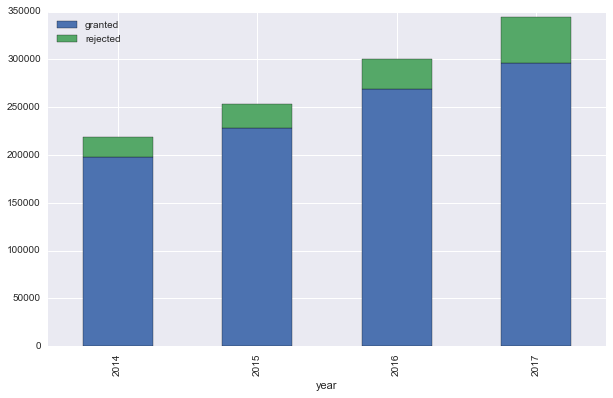

In [55]:
germany[['year','granted','rejected',]].plot(kind = 'bar', x = 'year', stacked = True, figsize = (10,6))

## Germany: What is the average rejection rate of visa applications from 2014 to 2017?

In [56]:
average_rejection_rate_ger = va_singles_ger['rejected_applications'].sum()/va_singles_ger['decisions'].sum()*100

print("On average, ",round(average_rejection_rate_ger) ," percent of visa applications between 2014 to 2017 got rejected by German authorities. Or:",round(average_rejection_rate_ger),"out of 100 applications were rejected between 2014 and 2017")

On average,  11.0  percent of visa applications between 2014 to 2017 got rejected by German authorities. Or: 11.0 out of 100 applications were rejected between 2014 and 2017


## Germany: Is the share of rejected applications higher in countries where many applications have been filed? (2014 to 2017)

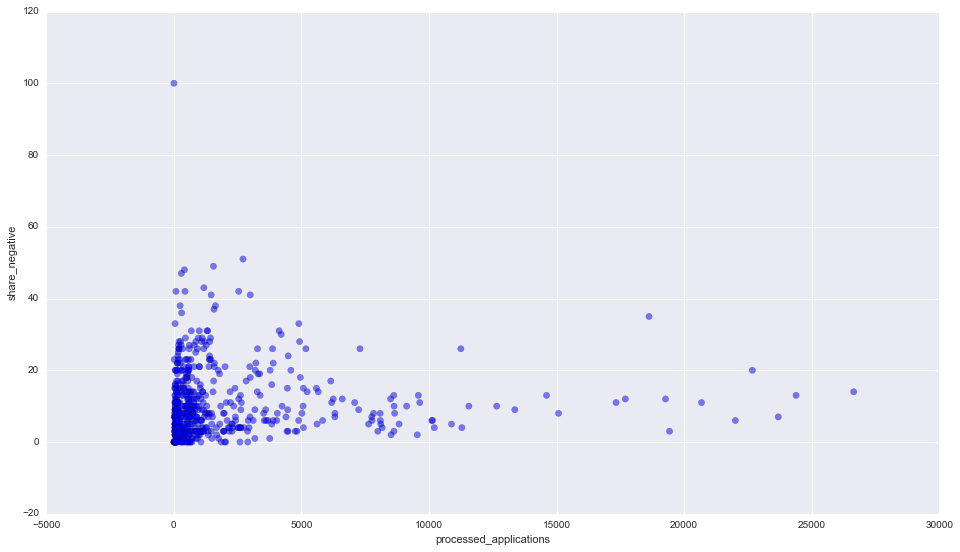

In [57]:
colors = {'Afrika':'blue', 'Europa':'blue', 'Asien':'blue', 'Nordamerika':'blue', 'Lateinamerika':'blue', 'Ozeanien':'blue'}

va_singles_ger.plot(kind = 'scatter', x = 'processed_applications', y = 'share_negative',s=40, c=va_singles['region'].apply(lambda x:colors[x]), figsize = (16,9), alpha=.5)

In [58]:
r = va_singles_ger.corr()['processed_applications']['share_negative']
r

0.045034706333745858

**Pearson's r** is a measure for whether or not there is a linear correlation between two variables like the (A) expenditure on education and (B) the primary enrollment. It can have a value between 1 and -1. If it's close to the former or the latter it means it has a strong positive (= if variable A increases, variable B increases too) or negative (= if variable A increases, variable B decreases) correlation. If the value for r is - as it is in our case - closer to zero, it means the two variables A and B are probably not correlated.

**Read**: Whether or not an application is rejected is not related to how many applications have been proccessed overall at a certain office

## Adding up all years

In [59]:
countries_list = []

for country in va_singles_ger['country']:
    countries_list.append(country)
    
all_countries = set(countries_list)

In [60]:
va_singles_ger_sums = []

for country in all_countries:
    country_total = {}
    country_total['country'] = country
    country_total['region'] = str(va_singles_ger[va_singles_ger['country'] == country]['region'].unique()).replace("['","").replace("']","")
    country_total['processed'] = va_singles_ger[va_singles_ger['country'] == country]['processed_applications'].sum()
    country_total['granted'] = va_singles_ger[va_singles_ger['country'] == country]['granted_applications'].sum()
    country_total['rejected'] = va_singles_ger[va_singles_ger['country'] == country]['rejected_applications'].sum()
    va_singles_ger_sums.append(country_total)

In [61]:
va_singles_ger_sum = pd.DataFrame(va_singles_ger_sums)
va_singles_ger_sum['decided'] = va_singles_ger_sum['rejected'] + va_singles_ger_sum['granted']
va_singles_ger_sum['share_rejected'] = (va_singles_ger_sum['rejected']/va_singles_ger_sum['processed'])*100
va_singles_ger_sum['share_negative'] = (va_singles_ger_sum['rejected']/va_singles_ger_sum['decided'])*100
va_singles_ger_sum['pp_difference'] = va_singles_ger_sum['share_negative']-va_singles_ger_sum['share_rejected']
va_singles_ger_sum['GER_decisions'] = va_singles_ger_sum['decided'].sum()
va_singles_ger_sum['share_total'] = (va_singles_ger_sum['decided']/va_singles_ger_sum['GER_decisions'])*100
va_singles_ger_sum = va_singles_ger_sum[['country','region','processed', 'decided', 'GER_decisions','share_total','granted', 'rejected','share_rejected', 'share_negative', 'pp_difference']]

va_singles_ger_sum.sort_values(by='share_negative', ascending = False)

,country,region,processed,decided,GER_decisions,share_total,granted,rejected,share_rejected,share_negative,pp_difference
28,Kamerun,Afrika,9700,9637,1115948,0.863571,5373,4264,43.958763,44.246135,0.287372
96,Kuwait,Asien,1380,1325,1115948,0.118733,740,585,42.391304,44.150943,1.759639
66,Kosovo,Europa,38940,38404,1115948,3.441379,27173,11231,28.841808,29.244350,0.402542
78,Côte d'Ivoire,Afrika,896,886,1115948,0.079394,627,259,28.906250,29.232506,0.326256
48,Ghana,Afrika,3850,3723,1115948,0.333618,2663,1060,27.532468,28.471663,0.939195
93,Bangladesch,Asien,4090,4037,1115948,0.361755,2944,1093,26.723716,27.074560,0.350844
36,Saudi-Arabien,Asien,6399,6174,1115948,0.553252,4511,1663,25.988436,26.935536,0.947100
101,Tunesien,Afrika,18835,18564,1115948,1.663518,13677,4887,25.946376,26.325145,0.378769
31,Guinea,Afrika,986,963,1115948,0.086294,710,253,25.659229,26.272066,0.612837
63,Marokko,Afrika,15162,15064,1115948,1.349884,11119,3945,26.018995,26.188263,0.169269


## Germany: How does the share of rejected applications between 2014 and 2017 differ among different countries?

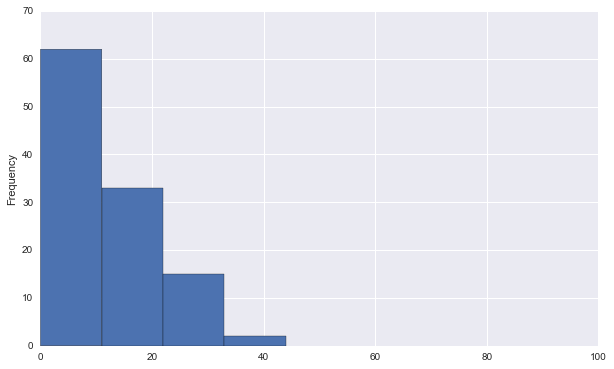

In [62]:
va_singles_ger_sum['share_rejected'].plot(kind = 'hist',bins = 4, figsize = (10,6), xlim=(0,100))

Read:
- For around 60 countries, the rejection rate is between 0 and 10 percent
- For around 32 countries, the rejection rate is between 10 and 20 percent
- For around 15 countries, the rejection rate is between 20 and 30 percent

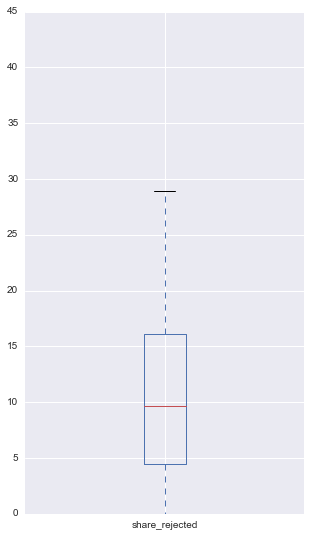

In [63]:
va_singles_ger_sum['share_rejected'].plot(kind = 'box', figsize = (5,9))

In [64]:
median_ger = va_singles_ger_sum['share_rejected'].median()
print('Half of all countries (across all years) have a rejection rate of', median_ger, 'percent or lower/higher')

Half of all countries (across all years) have a rejection rate of 9.627941243360857 percent or lower/higher


In [65]:
third_quartile = va_singles_ger_sum['share_rejected'].quantile(q=0.75)
print('Three quarter of all countries (and all years) have a rejection rate of',third_quartile ,'percent or lower')

Three quarter of all countries (and all years) have a rejection rate of 16.1165046413 percent or lower


In [66]:
first_quartile = va_singles_ger_sum['share_rejected'].quantile(q=0.25)
print('One quarter of all countries (and all years) have a rejection rate of',first_quartile ,'percent or lower')

One quarter of all countries (and all years) have a rejection rate of 4.46820486423 percent or lower


In [67]:
iqr = va_singles_ger_sum['share_rejected'].quantile(q=0.75) - va_singles_ger_sum['share_rejected'].quantile(q=0.25)

In [68]:
upper_acceptance_limit = va_singles_ger_sum['share_rejected'].quantile(q=0.75) + (iqr * 1.5)
print("Countries with a rejection rate of more than", upper_acceptance_limit, "percent would qualify as statistically significant outliers. This applies to the following countries:")

Countries with a rejection rate of more than 33.5889543068 percent would qualify as statistically significant outliers. This applies to the following countries:


In [69]:
va_singles_ger_sum[va_singles_ger_sum['share_rejected'] >= upper_acceptance_limit]

,country,region,processed,decided,GER_decisions,share_total,granted,rejected,share_rejected,share_negative,pp_difference
28,Kamerun,Afrika,9700,9637,1115948,0.863571,5373,4264,43.958763,44.246135,0.287372
96,Kuwait,Asien,1380,1325,1115948,0.118733,740,585,42.391304,44.150943,1.759639


## Germany: Of all visa application between 2014 and 2017, what share is from which continent?

In [70]:
region_list = ['Afrika', 'Asien', 'Europa', 'Lateinamerika', 'Nordamerika', 'Ozeanien']

regional_va = []
    
for region in region_list:
    region_dict = {}
    region_dict['region'] = region
    region_dict['decided'] = va_singles_ger_sum[va_singles_ger_sum['region']==region]['decided'].sum()
    region_dict['granted'] = va_singles_ger_sum[va_singles_ger_sum['region']==region]['granted'].sum()
    region_dict['rejected'] = va_singles_ger_sum[va_singles_ger_sum['region']==region]['rejected'].sum()
    regional_va.append(region_dict)

In [71]:
regional_df = pd.DataFrame(regional_va)
regional_df

,decided,granted,region,rejected
0,106028,82929,Afrika,23099
1,671774,607865,Asien,63909
2,259011,224468,Europa,34543
3,63067,59925,Lateinamerika,3142
4,13179,12925,Nordamerika,254
5,2889,2836,Ozeanien,53


In [72]:
regional_df = pd.DataFrame(regional_va)
regional_df['overall_decisions_GER'] = va_singles_ger_sum['decided'].sum()
regional_df['share_of_total'] = (regional_df['decided']/regional_df['overall_decisions_GER'])*100
regional_df['share_of_total_rounded'] = [int(value) for value in round(regional_df['share_of_total'])]
regional_df['share_negative'] = (regional_df['rejected']/regional_df['decided'])*100
regional_df['share_negative_rounded'] = [int(value) for value in round(regional_df['share_negative'])]
regional_df['overall_rejected_GER'] =  va_singles_ger_sum['rejected'].sum()
regional_df['share_total_negative'] = regional_df['rejected']/regional_df['overall_rejected_GER']*100
regional_df['share_total_negative_rounded'] = [int(value) for value in round(regional_df['share_total_negative'])]
regional_df = regional_df[['region','decided','overall_decisions_GER', 'share_of_total','share_of_total_rounded', 'granted', 'rejected','share_negative','share_negative_rounded','overall_rejected_GER','share_total_negative', 'share_total_negative_rounded']]
regional_df.sort_values(by = 'share_of_total', ascending = False)

,region,decided,overall_decisions_GER,share_of_total,share_of_total_rounded,granted,rejected,share_negative,share_negative_rounded,overall_rejected_GER,share_total_negative,share_total_negative_rounded
1,Asien,671774,1115948,60.197608,60,607865,63909,9.513467,10,125000,51.1272,51
2,Europa,259011,1115948,23.209952,23,224468,34543,13.336499,13,125000,27.6344,28
0,Afrika,106028,1115948,9.501160,10,82929,23099,21.785755,22,125000,18.4792,18
3,Lateinamerika,63067,1115948,5.651428,6,59925,3142,4.982003,5,125000,2.5136,3
4,Nordamerika,13179,1115948,1.180969,1,12925,254,1.927309,2,125000,0.2032,0
5,Ozeanien,2889,1115948,0.258883,0,2836,53,1.834545,2,125000,0.0424,0


In [73]:
regional_df.to_csv('editorial-team-info/Visa-Applications-byContinent-sum2014to2017.csv', encoding = 'utf-8')

**Read**: 

Applications from Asia accounted for the largest share of applications being made to Germany between 2014 and 2017: 
        - 60 percent of all applications decided upon were filed in Asia,
        - 23 percent were filed a European (non EU) countries
        - 10 percent were filed in Africa

Looking at how these applications were decided upon, Africa leads the field:
        - 22 percent of applications filed in Africa were rejected (every fifth application)
        - 13 percent of applications filed in Europe were rejected (every eigth application)
        - 10 percent of applications filed in Asia were rejected (every tenth application)

For reference: The average rejection rate for applications to Germany is 11 percent.

**Find**: An application from Africa is twice as likely to be rejected than an application from an Asian country for example.

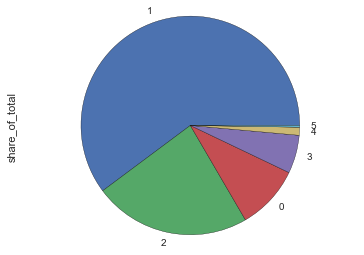

In [74]:
regional_df['share_of_total'].sort_values(ascending = False).plot(kind = 'pie', x = 'region')
plt.axis('equal')
plt.savefig('visuals/drafts/pie-applications.pdf', transparent = True)

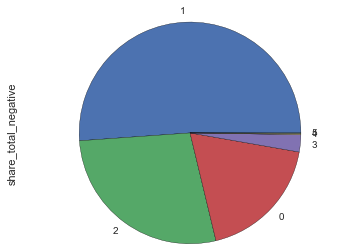

In [75]:
regional_df['share_total_negative'].sort_values(ascending = False).plot(kind = 'pie', x = 'region')
plt.axis('equal')
plt.savefig('visuals/drafts/pie-rejections.pdf', transparent = True)

In [76]:
possible_decisions = ['granted', 'rejected']

mosaic_world = pd.DataFrame()

for decision_type in possible_decisions:
    temp = regional_df[['region', decision_type]]
    temp['decision'] = decision_type
    temp=temp[['region', 'decision', decision_type]]
    temp.columns = (['region', 'decision', 'value'])
    mosaic_world = mosaic_world.append(temp)

In [77]:
mosaic_world.sort_values(['region', 'decision'], ascending = [True, True], inplace = True)
mosaic_world = mosaic_world.reset_index()
mosaic_world = mosaic_world[['region', 'decision', 'value']]
mosaic_world

,region,decision,value
0,Afrika,granted,82929
1,Afrika,rejected,23099
2,Asien,granted,607865
3,Asien,rejected,63909
4,Europa,granted,224468
5,Europa,rejected,34543
6,Lateinamerika,granted,59925
7,Lateinamerika,rejected,3142
8,Nordamerika,granted,12925
9,Nordamerika,rejected,254


In [78]:
mosaic_regions_list = []

for region in mosaic_world['region']:
    mosaic_regions_list.append(region)
    
mosaic_world_list = set(mosaic_regions_list)
sorted(mosaic_world_list)

['Afrika', 'Asien', 'Europa', 'Lateinamerika', 'Nordamerika', 'Ozeanien']

In [79]:
continent_applications = list(product(sorted(mosaic_world_list), ['granted', 'rejected']))

continent_index = pd.MultiIndex.from_tuples(continent_applications, names=['place', 'decision'])

continent_series = pd.Series([float(value) for value in mosaic_world['value']], index = continent_index)
continent_series

place          decision
Afrika         granted      82929.0
               rejected     23099.0
Asien          granted     607865.0
               rejected     63909.0
Europa         granted     224468.0
               rejected     34543.0
Lateinamerika  granted      59925.0
               rejected      3142.0
Nordamerika    granted      12925.0
               rejected       254.0
Ozeanien       granted       2836.0
               rejected        53.0
dtype: float64

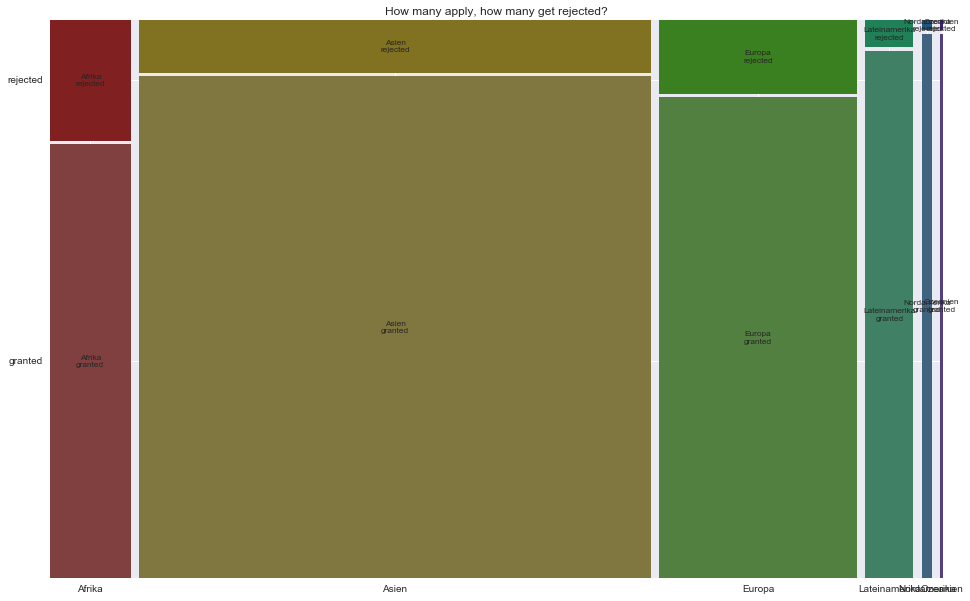

In [80]:
fig, ax = plt.subplots(figsize = (16,10))

mosaic(continent_series, gap=0.01, title='How many apply, how many get rejected?', ax = ax)
plt.savefig('visuals/drafts/marimekko-continents.pdf', transparent = True)
plt.show()

## Germany, single year: How do national rejection rates compare to other countries' from the same continent?

In [81]:
va_singles_ger_sum.sort_values(by = 'share_negative',ascending = False).head(10)

,country,region,processed,decided,GER_decisions,share_total,granted,rejected,share_rejected,share_negative,pp_difference
28,Kamerun,Afrika,9700,9637,1115948,0.863571,5373,4264,43.958763,44.246135,0.287372
96,Kuwait,Asien,1380,1325,1115948,0.118733,740,585,42.391304,44.150943,1.759639
66,Kosovo,Europa,38940,38404,1115948,3.441379,27173,11231,28.841808,29.244350,0.402542
78,Côte d'Ivoire,Afrika,896,886,1115948,0.079394,627,259,28.906250,29.232506,0.326256
48,Ghana,Afrika,3850,3723,1115948,0.333618,2663,1060,27.532468,28.471663,0.939195
93,Bangladesch,Asien,4090,4037,1115948,0.361755,2944,1093,26.723716,27.074560,0.350844
36,Saudi-Arabien,Asien,6399,6174,1115948,0.553252,4511,1663,25.988436,26.935536,0.947100
101,Tunesien,Afrika,18835,18564,1115948,1.663518,13677,4887,25.946376,26.325145,0.378769
31,Guinea,Afrika,986,963,1115948,0.086294,710,253,25.659229,26.272066,0.612837
63,Marokko,Afrika,15162,15064,1115948,1.349884,11119,3945,26.018995,26.188263,0.169269


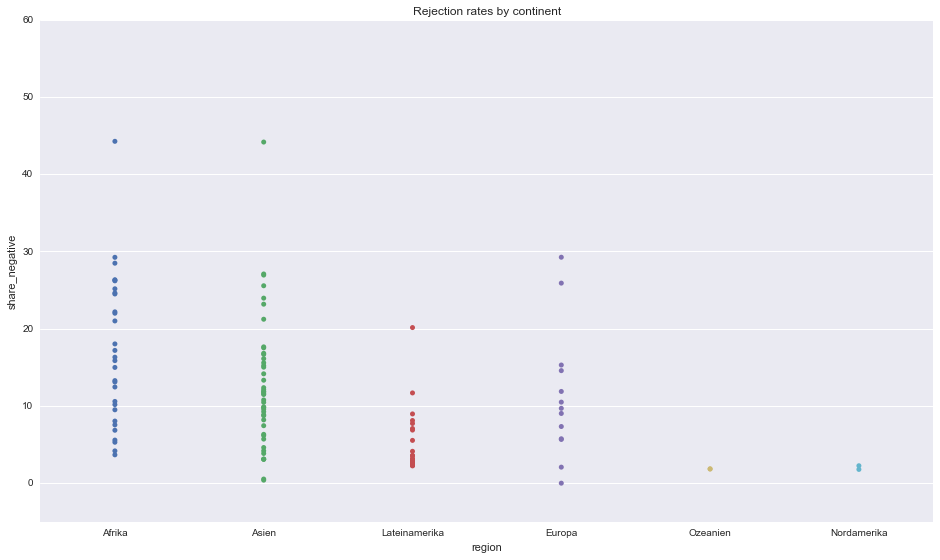

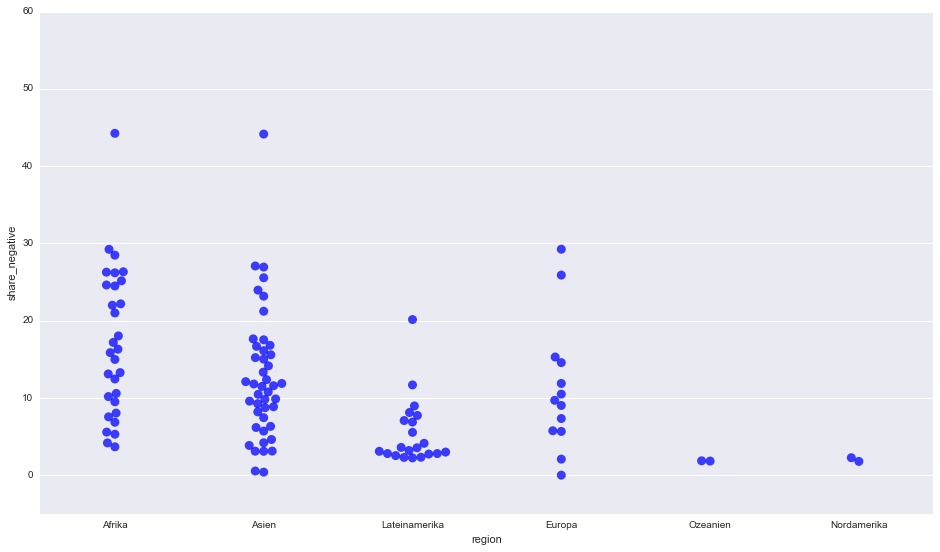

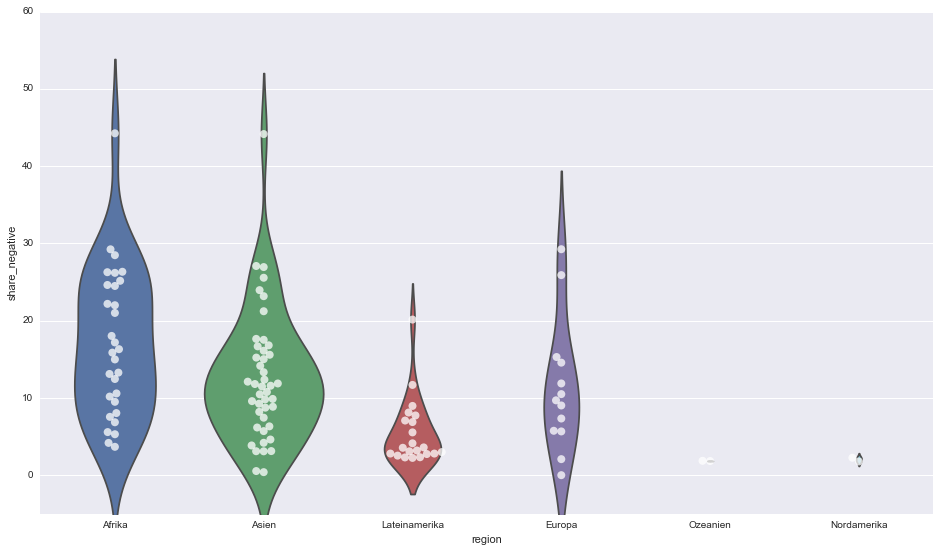

In [82]:
data_selection = va_singles_ger_sum

#stripplot

fig, ax = plt.subplots(figsize = (16,9))
ax.set_ylim(-5,60)
ax.set_title('Rejection rates by continent')

sns.stripplot(ax = ax, x="region", y="share_negative", data=data_selection)

#swarmplot
fig, ax = plt.subplots(figsize = (16,9))
ax.set_ylim(-5,60)

# colors = {'Afrika':'red', 'Europa':'blue', 'Asien':'blue', 'Nordamerika':'blue', 'Lateinamerika':'blue', 'Ozeanien':'blue'}

# va_singles_ger.plot(kind = 'scatter', x = 'processed_applications', y = 'share_negative',s=40, c=va_singles['region'].apply(lambda x:colors[x]), figsize = (16,9), alpha=.5)

sns.swarmplot(x="region", y="share_negative", data=data_selection, color="blue", alpha=.75, s=9)
plt.savefig('visuals/drafts/distribution-swarm.pdf', transparent = True)


#violinplot with swarmplot
fig, ax = plt.subplots(figsize = (16,9))
ax.set_ylim(-5,60)

sns.violinplot(ax=ax,x="region", y="share_negative", scale="count", data=data_selection, inner = None)
sns.swarmplot(x="region", y="share_negative", data=data_selection, color="w", alpha=.75, s=8)
# plt.savefig('visuals/drafts/distribution-violin.pdf', transparent = True)

# Below: Macro-analysis for selected continent

In [83]:
selected_continent = 'Afrika'

## Germany: How has the number of applications evolved over time in each county for different  countries of the selected continent?

In [84]:
places_list = []
for place in va_singles_ger_sum['country']:
    places_list.append(place)

In [85]:
places = set(places_list)

In [86]:
selected_continent_list = []

for country in va_singles_ger[va_singles_ger['region'] ==selected_continent]['application_origin']:
    selected_continent_list.append(country)

In [87]:
continent_countries = set(selected_continent_list)

In [88]:
sample_df = va_singles_ger[va_singles_ger['region'] ==selected_continent]
ordered_names = sample_df.groupby("application_origin")['decisions'].last().sort_values(ascending=False).index
ordered_names = ordered_names.tolist()
ordered_names

['Ägypten – Kairo',
 'Tunesien – Tunis',
 'Marokko – Rabat',
 'Kamerun – Jaunde',
 'Kenia – Nairobi',
 'Nigeria – Lagos',
 'Ghana – Accra',
 'Äthiopien – Addis Abeba',
 'Tansania – Daressalam',
 'Südafrika – Pretoria',
 'Algerien – Algier',
 'Sudan – Khartum',
 'Senegal – Dakar',
 'Libyen – Tripolis',
 'Togo – Lomé',
 'Südafrika – Kapstadt',
 'Simbabwe – Harare',
 'Uganda – Kampala',
 'Guinea – Conakry',
 "Côte d'Ivoire – Abidjan",
 'Burkina Faso – Ouagadougou',
 'Ruanda – Kigali',
 'Benin – Cotonou',
 'Sambia – Lusaka',
 'Namibia – Windhuk',
 'Kongo – Kinshasa',
 'Nigeria – Abuja',
 'Mosambik – Maputo',
 'Mali – Bamako',
 'Mauretanien – Nouakchott',
 'Botsuana – Gaborone',
 'Angola – Luanda']

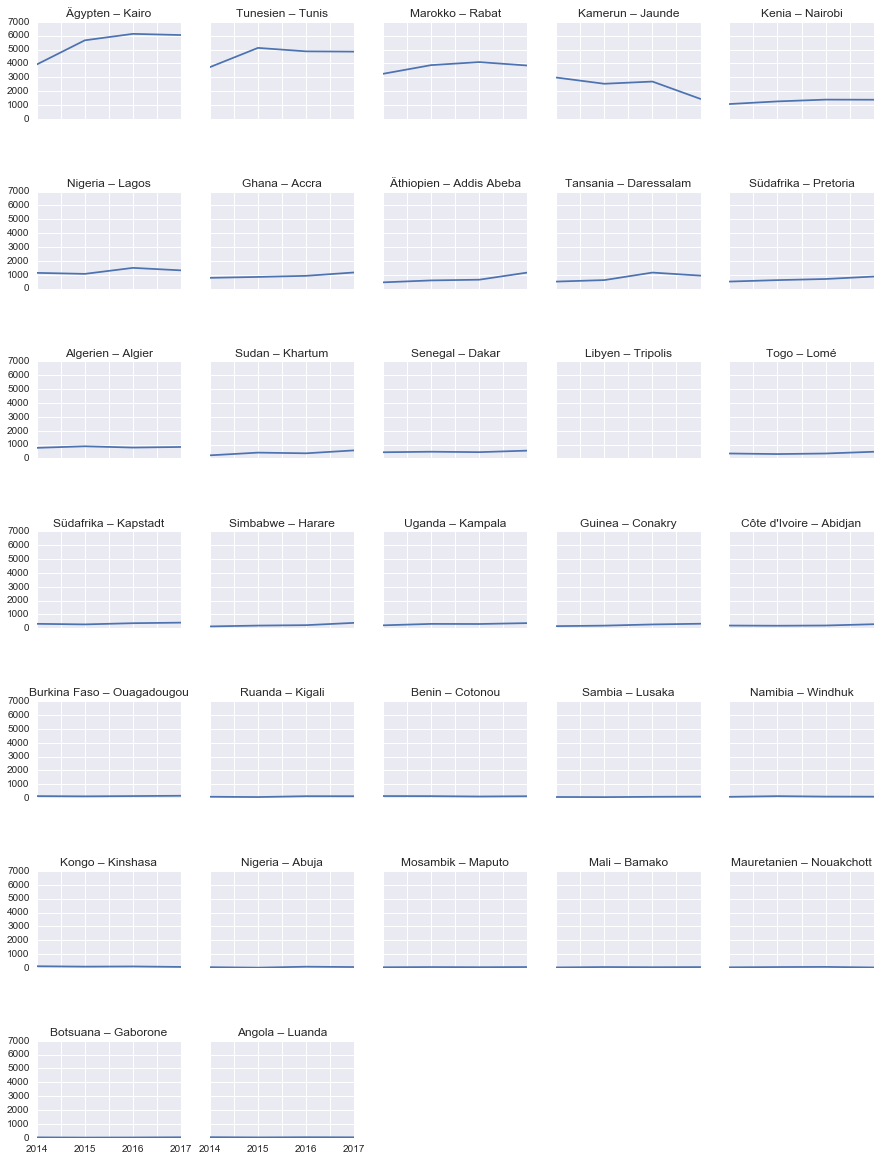

In [89]:
df = va_singles_ger.copy()
fig, axes = plt.subplots(nrows=7, ncols=5, sharex=True, sharey=True, figsize=(15,20))
axes_list = [item for sublist in axes for item in sublist]

subset_df = df[df['application_origin'].isin(selected_continent_list)]

grouped = subset_df.groupby("application_origin")

ordered_country_names = ordered_names

for countryname in ordered_country_names:
    selection = grouped.get_group(countryname)
    
    ax = axes_list.pop(0)
    selection.plot(x='year', y='decisions', label = countryname, ax=ax, legend = False)
    ax.set_title(countryname)
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    #ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
    
for ax in axes_list:
    ax.remove()
    
    ax.set_title('Number of visa applications by office over time (2014-2017)')
    
plt.savefig('editorial-team-info/'+selected_continent+'-Visa-Applications-TimeSeries.pdf', transparent = True)    
    
plt.subplots_adjust(hspace=0.75)

## Germany: How has the rejection rate evolved over time for different countries from the selected continent?

In [90]:
sample_df2 = va_singles_ger[va_singles_ger['region'] ==selected_continent]
ordered_names2 = sample_df2.groupby("application_origin")['share_rejected'].last().sort_values(ascending=False).index
ordered_names2 = ordered_names2.tolist()
ordered_names2

['Äthiopien – Addis Abeba',
 'Kamerun – Jaunde',
 "Côte d'Ivoire – Abidjan",
 'Tunesien – Tunis',
 'Ghana – Accra',
 'Marokko – Rabat',
 'Sudan – Khartum',
 'Guinea – Conakry',
 'Algerien – Algier',
 'Kenia – Nairobi',
 'Senegal – Dakar',
 'Benin – Cotonou',
 'Uganda – Kampala',
 'Nigeria – Lagos',
 'Togo – Lomé',
 'Ägypten – Kairo',
 'Mauretanien – Nouakchott',
 'Tansania – Daressalam',
 'Mali – Bamako',
 'Namibia – Windhuk',
 'Libyen – Tripolis',
 'Sambia – Lusaka',
 'Angola – Luanda',
 'Ruanda – Kigali',
 'Burkina Faso – Ouagadougou',
 'Simbabwe – Harare',
 'Südafrika – Pretoria',
 'Mosambik – Maputo',
 'Südafrika – Kapstadt',
 'Kongo – Kinshasa',
 'Botsuana – Gaborone',
 'Nigeria – Abuja']

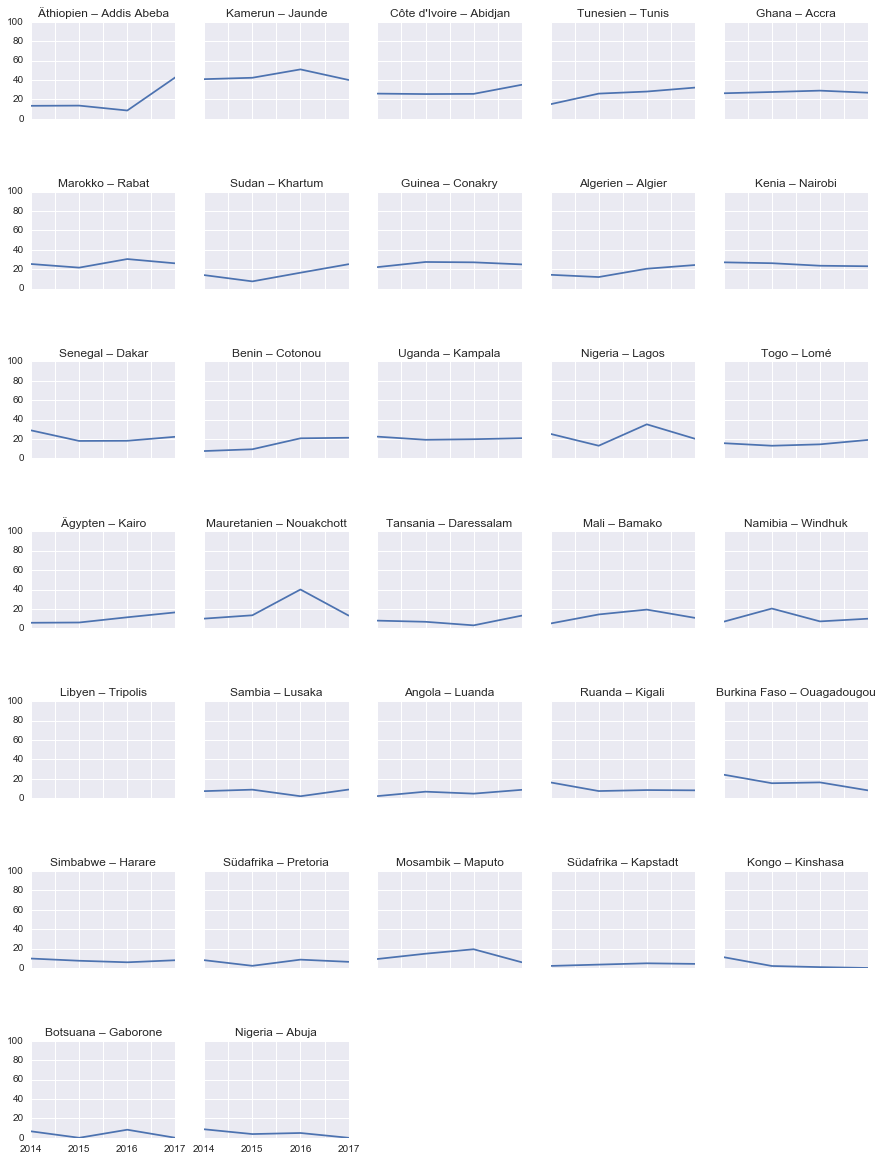

In [91]:
df = va_singles_ger.copy()
fig, axes = plt.subplots(nrows=7, ncols=5, sharex=True, sharey=True, figsize=(15,20))
axes_list = [item for sublist in axes for item in sublist]

subset_df = df[df['application_origin'].isin(selected_continent_list)]

grouped2 = subset_df.groupby("application_origin")

ordered_country_names = ordered_names2

for countryname in ordered_country_names:
    selection = grouped2.get_group(countryname)
    
    ax = axes_list.pop(0)
    selection.plot(x='year', y='share_rejected', label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.set_ylim(0,100)
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    #ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")

for ax in axes_list:
    ax.remove()  
    
    ax.set_title('Visa rejection rate (negative decisions out of total decisions) by office over time (2014-2017)')
    
plt.savefig('editorial-team-info/'+selected_continent+'-Visa-RejectionRates-TimeSeries.pdf', transparent = True)    
    
plt.subplots_adjust(hspace=0.75)

## Germany: How do rejection rates differ among countries on the selected continent?

In [92]:
va_ger_selected_continent = va_singles_ger[va_singles_ger['region']==selected_continent]

In [93]:
min_continent = va_ger_selected_continent['share_rejected'].min()
min_continent

0.0

In [94]:
va_ger_selected_continent[va_ger_selected_continent['share_rejected'] == min_continent]

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected,application_origin,name,region,decisions,share_negative,pp_difference
141,18,2015,Botsuana,Gaborone,Germany,17,0,17,0,0.0,Botsuana – Gaborone,Botsuana,Afrika,17,0.0,0.0
143,18,2017,Botsuana,Gaborone,Germany,38,0,38,0,0.0,Botsuana – Gaborone,Botsuana,Afrika,38,0.0,0.0
607,84,2017,Kongo,Kinshasa,Germany,77,2,75,0,0.0,Kongo – Kinshasa,Kongo,Afrika,75,0.0,0.0
848,113,2017,Nigeria,Abuja,Germany,72,5,67,0,0.0,Nigeria – Abuja,Nigeria,Afrika,67,0.0,0.0


In [95]:
max_continent = va_ger_selected_continent['share_rejected'].max()
max_continent

50.960000000000001

In [96]:
va_ger_selected_continent[va_ger_selected_continent['share_rejected'] == max_continent]

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected,application_origin,name,region,decisions,share_negative,pp_difference
534,73,2016,Kamerun,Jaunde,Germany,2708,18,1310,1380,50.96,Kamerun – Jaunde,Kamerun,Afrika,2690,51.0,0.04


## Check for countries with more than one office where visa applications can be filed

In [97]:
# Because we have datapoints for four years, the value_count should be 4 if there is only one branch 
# and greater than four if there is more
# if it is smaller than 4, then datapoints for some of the years are missing

In [98]:
va_ger_selected_continent['country'].value_counts()

Südafrika        8
Nigeria          8
Mauretanien      4
Ruanda           4
Simbabwe         4
Senegal          4
Marokko          4
Botsuana         4
Kongo            4
Angola           4
Namibia          4
Burkina Faso     4
Äthiopien        4
Côte d'Ivoire    4
Togo             4
Ägypten          4
Sambia           4
Mosambik         4
Kenia            4
Uganda           4
Mali             4
Algerien         4
Tansania         4
Sudan            4
Benin            4
Kamerun          4
Tunesien         4
Guinea           4
Ghana            4
Libyen           1
Name: country, dtype: int64

In [99]:
va_ger_selected_continent['country'].value_counts() != 4

Südafrika         True
Nigeria           True
Mauretanien      False
Ruanda           False
Simbabwe         False
Senegal          False
Marokko          False
Botsuana         False
Kongo            False
Angola           False
Namibia          False
Burkina Faso     False
Äthiopien        False
Côte d'Ivoire    False
Togo             False
Ägypten          False
Sambia           False
Mosambik         False
Kenia            False
Uganda           False
Mali             False
Algerien         False
Tansania         False
Sudan            False
Benin            False
Kamerun          False
Tunesien         False
Guinea           False
Ghana            False
Libyen            True
Name: country, dtype: bool

In [100]:
va_ger_selected_continent.groupby(by= 'country').filter(lambda x: len(x) != 4)

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected,application_origin,name,region,decisions,share_negative,pp_difference
681,94,2014,Libyen,Tripolis,Germany,573,36,486,51,8.90,Libyen – Tripolis,Libyen,Afrika,537,9.0,0.10
842,114,2014,Nigeria,Abuja,Germany,57,0,52,5,8.77,Nigeria – Abuja,Nigeria,Afrika,57,9.0,0.23
843,115,2014,Nigeria,Lagos,Germany,1172,32,843,297,25.34,Nigeria – Lagos,Nigeria,Afrika,1140,26.0,0.66
844,113,2015,Nigeria,Abuja,Germany,26,2,23,1,3.85,Nigeria – Abuja,Nigeria,Afrika,24,4.0,0.15
845,114,2015,Nigeria,Lagos,Germany,1132,65,918,149,13.16,Nigeria – Lagos,Nigeria,Afrika,1067,14.0,0.84
846,113,2016,Nigeria,Abuja,Germany,101,9,87,5,4.95,Nigeria – Abuja,Nigeria,Afrika,92,5.0,0.05
847,114,2016,Nigeria,Lagos,Germany,1570,70,947,553,35.22,Nigeria – Lagos,Nigeria,Afrika,1500,37.0,1.78
848,113,2017,Nigeria,Abuja,Germany,72,5,67,0,0.00,Nigeria – Abuja,Nigeria,Afrika,67,0.0,0.00
849,114,2017,Nigeria,Lagos,Germany,1375,54,1041,280,20.36,Nigeria – Lagos,Nigeria,Afrika,1321,21.0,0.64
1114,152,2014,Südafrika,Kapstadt,Germany,332,8,317,7,2.11,Südafrika – Kapstadt,Südafrika,Afrika,324,2.0,-0.11


## Adding up values for all years and countries with more than one place to file visa applications --> List of countries where most visa applications where filed between 2014 and 2017

Goal: To have a table of application statistics for each country as a sum over the period of 2014 to 2017

In [101]:
continent_countries_list = []

for country in va_ger_selected_continent['country']:
    continent_countries_list.append(country)

continent_countries = set(continent_countries_list)

In [102]:
va_ger_continent_list = []

for country in continent_countries:
    country_total = {}
    country_total['country'] = country
    country_total['processed'] = va_ger_selected_continent[va_ger_selected_continent['country'] == country]['processed_applications'].sum()
    country_total['granted'] = va_ger_selected_continent[va_ger_selected_continent['country'] == country]['granted_applications'].sum()
    country_total['rejected'] = va_ger_selected_continent[va_ger_selected_continent['country'] == country]['rejected_applications'].sum()
    va_ger_continent_list.append(country_total)

In [103]:
va_ger_continent_sum = pd.DataFrame(va_ger_continent_list)
va_ger_continent_sum['decided'] = va_ger_continent_sum['rejected'] + va_ger_continent_sum['granted']
va_ger_continent_sum['share_rejected'] = (va_ger_continent_sum['rejected']/va_ger_continent_sum['processed'])*100
va_ger_continent_sum['share_negative'] = (va_ger_continent_sum['rejected']/va_ger_continent_sum['decided'])*100
va_ger_continent_sum['share_negative_rounded'] = [int(value) for value in round(va_ger_continent_sum['share_negative'])]
va_ger_continent_sum['pp_difference'] = va_ger_continent_sum['share_negative']-va_ger_continent_sum['share_rejected']
va_ger_continent_sum['continent_decisions'] = va_ger_continent_sum['decided'].sum()
va_ger_continent_sum['share_total'] = (va_ger_continent_sum['decided']/va_ger_continent_sum['continent_decisions'])*100
va_ger_continent_sum['share_total_rounded'] = [int(value) for value in round(va_ger_continent_sum['share_total'])]
va_ger_continent_sum = va_ger_continent_sum[['country','processed', 'decided', 'continent_decisions','share_total','share_total_rounded', 'granted', 'rejected','share_rejected', 'share_negative', 'share_negative_rounded','pp_difference']]

va_ger_continent_sum.sort_values(by='share_total', ascending = False)

,country,processed,decided,continent_decisions,share_total,share_total_rounded,granted,rejected,share_rejected,share_negative,share_negative_rounded,pp_difference
16,Ägypten,22255,21758,106028,20.520994,21,19456,2302,10.343743,10.580017,11,0.236274
12,Tunesien,18835,18564,106028,17.508583,18,13677,4887,25.946376,26.325145,26,0.378769
2,Marokko,15162,15064,106028,14.207568,14,11119,3945,26.018995,26.188263,26,0.169269
27,Kamerun,9700,9637,106028,9.089109,9,5373,4264,43.958763,44.246135,44,0.287372
3,Nigeria,5505,5268,106028,4.968499,5,3978,1290,23.433243,24.487472,24,1.054229
23,Kenia,5150,5092,106028,4.802505,5,3811,1281,24.873786,25.157109,25,0.283323
21,Südafrika,4194,4089,106028,3.856528,4,3861,228,5.436338,5.575935,6,0.139598
14,Ghana,3850,3723,106028,3.511337,4,2663,1060,27.532468,28.471663,28,0.939195
24,Algerien,3317,3268,106028,3.082205,3,2679,589,17.757009,18.023256,18,0.266246
11,Tansania,3267,3232,106028,3.048251,3,2988,244,7.468626,7.549505,8,0.080879


In [104]:
va_ger_continent_sum[['country','processed','decided','continent_decisions', 'share_total', 'share_total_rounded','granted', 'rejected', 'share_negative', 'share_negative_rounded']].to_csv('editorial-team-info/'+selected_continent+'-Visa-Applications-2014to2017.csv', encoding = 'utf-8')

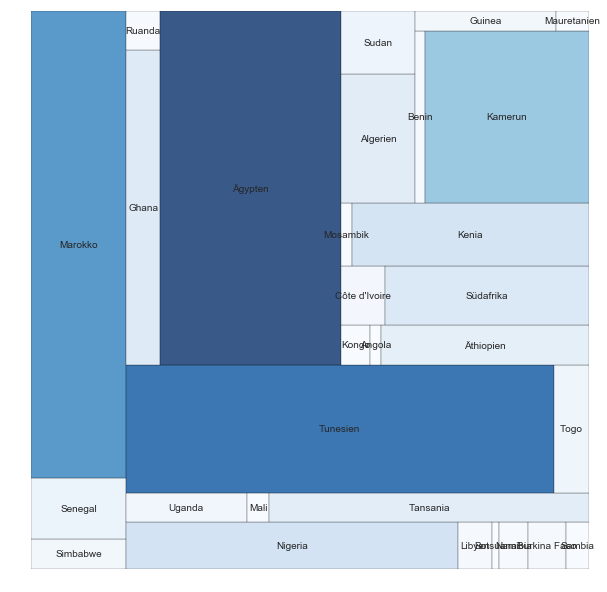

In [105]:
fig, ax = plt.subplots(figsize=(10,10))

cmap = matplotlib.cm.Blues
mini=va_ger_continent_sum['decided'].min()
maxi=va_ger_continent_sum['decided'].max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in va_ger_continent_sum['decided']]

squarify.plot(ax = ax , sizes = va_ger_continent_sum['decided'], label = va_ger_continent_sum['country'], alpha = .8, color = colors)
plt.axis('off')
plt.show()

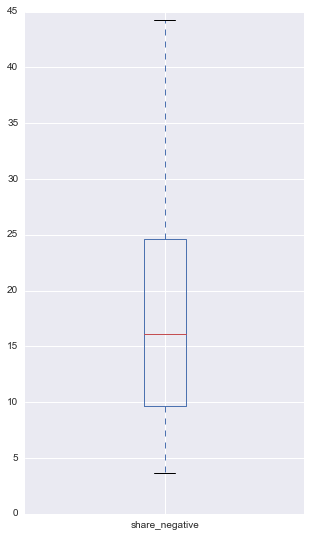

In [106]:
va_ger_continent_sum['share_negative'].plot(kind = 'box', figsize = (5,9))

In [107]:
median_continent = va_ger_continent_sum['share_negative'].median()
print("Half of all countries from the selected continent have a rejection rate that is higher than", round(median_continent),"percent.")
print("For comparison: The average rejection rate for visa applications to Germany is", int(round(average_rejection_rate_ger)), "percent.")
print("List of countries with a rejection rate higher than the average rejection rate for visas to Germany of",  int(round(average_rejection_rate_ger)), "percent:")

Half of all countries from the selected continent have a rejection rate that is higher than 16 percent.
For comparison: The average rejection rate for visa applications to Germany is 11 percent.
List of countries with a rejection rate higher than the average rejection rate for visas to Germany of 11 percent:


In [108]:
va_ger_continent_sum[va_ger_continent_sum['share_negative']>average_rejection_rate_ger].sort_values(by='share_negative')

,country,processed,decided,continent_decisions,share_total,share_total_rounded,granted,rejected,share_rejected,share_negative,share_negative_rounded,pp_difference
22,Mosambik,247,241,106028,0.227298,0,211,30,12.145749,12.448133,12,0.302384
6,Namibia,506,458,106028,0.431961,0,398,60,11.857708,13.100437,13,1.242729
10,Mali,232,226,106028,0.213151,0,196,30,12.931034,13.274336,13,0.343302
26,Benin,573,554,106028,0.522503,1,471,83,14.485166,14.981949,15,0.496784
7,Burkina Faso,608,599,106028,0.564945,1,504,95,15.625000,15.859766,16,0.234766
13,Togo,1556,1527,106028,1.440186,1,1278,249,16.002571,16.306483,16,0.303913
25,Sudan,1631,1612,106028,1.520353,2,1335,277,16.983446,17.183623,17,0.200177
24,Algerien,3317,3268,106028,3.082205,3,2679,589,17.757009,18.023256,18,0.266246
9,Uganda,1253,1224,106028,1.154412,1,967,257,20.510774,20.996732,21,0.485958
1,Senegal,1976,1964,106028,1.852341,2,1532,432,21.862348,21.995927,22,0.133579


In [118]:
va_ger_continent_sum.sort_values(by='decided', ascending = False)

,country,processed,decided,continent_decisions,share_total,share_total_rounded,granted,rejected,share_rejected,share_negative,share_negative_rounded,pp_difference
16,Ägypten,22255,21758,106028,20.520994,21,19456,2302,10.343743,10.580017,11,0.236274
12,Tunesien,18835,18564,106028,17.508583,18,13677,4887,25.946376,26.325145,26,0.378769
2,Marokko,15162,15064,106028,14.207568,14,11119,3945,26.018995,26.188263,26,0.169269
27,Kamerun,9700,9637,106028,9.089109,9,5373,4264,43.958763,44.246135,44,0.287372
3,Nigeria,5505,5268,106028,4.968499,5,3978,1290,23.433243,24.487472,24,1.054229
23,Kenia,5150,5092,106028,4.802505,5,3811,1281,24.873786,25.157109,25,0.283323
21,Südafrika,4194,4089,106028,3.856528,4,3861,228,5.436338,5.575935,6,0.139598
14,Ghana,3850,3723,106028,3.511337,4,2663,1060,27.532468,28.471663,28,0.939195
24,Algerien,3317,3268,106028,3.082205,3,2679,589,17.757009,18.023256,18,0.266246
11,Tansania,3267,3232,106028,3.048251,3,2988,244,7.468626,7.549505,8,0.080879


## Which are the top 15 countries of the selected continent to apply for a visa to Germany and how are the chances for each?

In [117]:
continent_top15 = va_ger_continent_sum.sort_values(by='share_total', ascending = False).head(15)
continent_top15

,country,processed,decided,continent_decisions,share_total,share_total_rounded,granted,rejected,share_rejected,share_negative,share_negative_rounded,pp_difference
16,Ägypten,22255,21758,106028,20.520994,21,19456,2302,10.343743,10.580017,11,0.236274
12,Tunesien,18835,18564,106028,17.508583,18,13677,4887,25.946376,26.325145,26,0.378769
2,Marokko,15162,15064,106028,14.207568,14,11119,3945,26.018995,26.188263,26,0.169269
27,Kamerun,9700,9637,106028,9.089109,9,5373,4264,43.958763,44.246135,44,0.287372
3,Nigeria,5505,5268,106028,4.968499,5,3978,1290,23.433243,24.487472,24,1.054229
23,Kenia,5150,5092,106028,4.802505,5,3811,1281,24.873786,25.157109,25,0.283323
21,Südafrika,4194,4089,106028,3.856528,4,3861,228,5.436338,5.575935,6,0.139598
14,Ghana,3850,3723,106028,3.511337,4,2663,1060,27.532468,28.471663,28,0.939195
24,Algerien,3317,3268,106028,3.082205,3,2679,589,17.757009,18.023256,18,0.266246
11,Tansania,3267,3232,106028,3.048251,3,2988,244,7.468626,7.549505,8,0.080879


**Finds:** 

    - Most applications from African countries come from
        - Egypt (21%)
        - Tunisia (18%)
        - Morocco (14%)
      follow ups are
        - Cameroon (9%)
        - Kenya (5%)
        - Nigeria (5%)
        
    - The picture changes when looking at the share of applications rejected
        - Cameroon has - with a large margin - the largest share of rejection (44%) (almost every second application 
        gets rejected)
        - countries with an anbove average (22%) rejection rate are: Ivory Coast, Ghana, Tunesien, Guinea, Morocco, 
        Nigeria, Kenya, Ethiopia

    - An application filed in Pretoria, South Africa between 2014 and 2017 is twice as likely to be rejected as an application filed in Cape Town, South Africa. Although, overall rejection rates for South Africa are among the lowest
    
 

In [110]:
possible_decisions = ['granted', 'rejected']

mosaic_continent = pd.DataFrame()

for decision_type in possible_decisions:
    temp = continent_top15[['country', decision_type]]
    temp['decision'] = decision_type
    temp = temp[['country', 'decision', decision_type]]
    temp.columns = (['country', 'decision', 'value'])
    mosaic_continent = mosaic_continent.append(temp)

In [111]:
mosaic_continent.sort_values(['country', 'decision'], ascending = [True, True], inplace = True)
mosaic_continent = mosaic_continent.reset_index()
mosaic_continent = mosaic_continent[['country', 'decision', 'value']]
mosaic_continent

,country,decision,value
0,Algerien,granted,2679
1,Algerien,rejected,589
2,Ghana,granted,2663
3,Ghana,rejected,1060
4,Kamerun,granted,5373
5,Kamerun,rejected,4264
6,Kenia,granted,3811
7,Kenia,rejected,1281
8,Marokko,granted,11119
9,Marokko,rejected,3945


In [112]:
mosaic_countries_list = []

for country in mosaic_continent['country']:
    mosaic_countries_list.append(country)
    
mosaic_country_list = set(mosaic_countries_list)
sorted(mosaic_country_list)

['Algerien',
 'Ghana',
 'Kamerun',
 'Kenia',
 'Marokko',
 'Nigeria',
 'Senegal',
 'Sudan',
 'Südafrika',
 'Tansania',
 'Togo',
 'Tunesien',
 'Uganda',
 'Ägypten',
 'Äthiopien']

In [113]:
applications = list(product(sorted(mosaic_country_list), ['granted', 'rejected']))

index = pd.MultiIndex.from_tuples(applications, names=['country', 'decision'])

series = pd.Series([float(value) for value in mosaic_continent['value']], index = index)
series

country    decision
Algerien   granted      2679.0
           rejected      589.0
Ghana      granted      2663.0
           rejected     1060.0
Kamerun    granted      5373.0
           rejected     4264.0
Kenia      granted      3811.0
           rejected     1281.0
Marokko    granted     11119.0
           rejected     3945.0
Nigeria    granted      3978.0
           rejected     1290.0
Senegal    granted      1532.0
           rejected      432.0
Sudan      granted      1335.0
           rejected      277.0
Südafrika  granted      3861.0
           rejected      228.0
Tansania   granted      2988.0
           rejected      244.0
Togo       granted      1278.0
           rejected      249.0
Tunesien   granted     13677.0
           rejected     4887.0
Uganda     granted       967.0
           rejected      257.0
Ägypten    granted     19456.0
           rejected     2302.0
Äthiopien  granted      2156.0
           rejected      704.0
dtype: float64

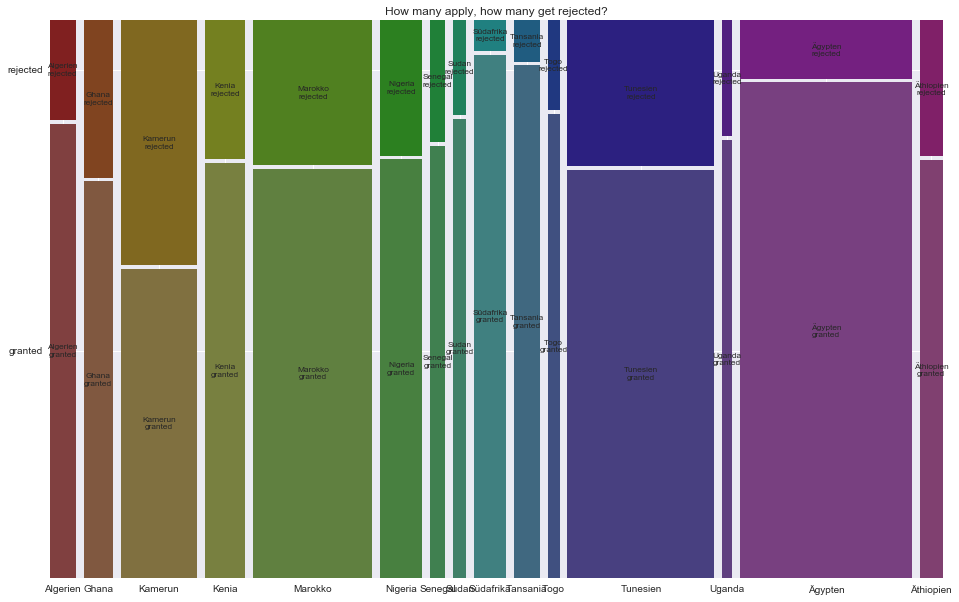

In [114]:
fig, ax = plt.subplots(figsize = (16,10))

mosaic(series, gap=0.01, title='How many apply, how many get rejected?', ax = ax)
plt.savefig('visuals/drafts/marimekko-'+selected_continent+'.pdf', transparent = True)
plt.show()